In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pickle

### Load the projections onto the location vectors obtained with the HOSVD.

In [2]:
sample_proj = torch.load('DeCET_REMC_demo_HOSVD_projections.pt').numpy()
print(sample_proj.shape)

N0 = sample_proj.shape[0] # number of samples
N1 = sample_proj.shape[1] # number of assays

(3, 5, 15)


### Plot the projections onto the HOSVD location vectors.

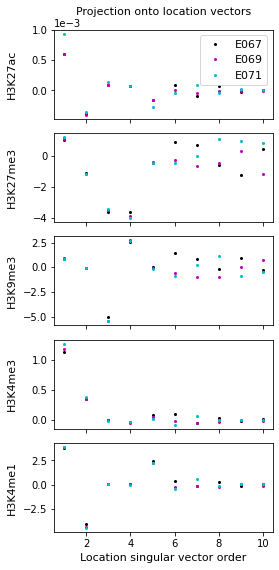

In [3]:
n_proj = 10 # Set the number of location vectors to plot the projections onto
assay_name = ['H3K27ac', 'H3K27me3', 'H3K9me3', 'H3K4me3', 'H3K4me1']

fig = plt.figure(figsize=(4,8))
ax = []

for k in range(N1):
    ax.append(fig.add_subplot(511+k))
    l1, = ax[k].plot(sample_proj[0, k][0:n_proj],'.', markersize=4, c=(0,0,0,1))
    l2, = ax[k].plot(sample_proj[1, k][0:n_proj],'.', markersize=4, c=(0.75,0,0.75,1))
    l3, = ax[k].plot(sample_proj[2, k][0:n_proj],'.', markersize=4, c=(0,0.75,0.75,1))


    if(k == 0):
        plt.title('Projection onto location vectors',fontsize=11,y=1.1)
        ax[k].legend([l1, l2, l3], ["E067", "E069", "E071"], fontsize=11)
        
    ax[k].set_ylabel(assay_name[k],fontsize=11)
    ax[k].get_yaxis().set_label_coords(-0.17,0.5)

    ax[k].ticklabel_format(axis='y', style='sci', scilimits=(0.0,0.0))
    if(k < N1-1): 
        plt.setp(ax[k].get_xticklabels(), visible=False)
    if(k != 0):
        ax[k].yaxis.get_offset_text().set_visible(False)
    
    if(k == N1-1):
        ax[k].set_xlabel('Location singular vector order',fontsize=11)
        plt.setp(ax[k].get_xticklabels(), visible=True)
        plt.xticks([2*i+1 for i in range(int(n_proj/2))], [2*(i+1) for i in range(int(n_proj/2))])
    plt.setp(ax[k].get_xticklabels(), visible=True)
    plt.xticks([2*i+1 for i in range(int(n_proj/2))], [2*(i+1) for i in range(int(n_proj/2))])

plt.tight_layout()

### Load the genomic location vectors.

In [4]:
U_l = torch.load('DeCET_REMC_demo_HOSVD_factor_matrix_2.pt').numpy()
print(U_l.shape)

(1547874, 15)


### Load the index to genomic coordinate list and print the 5 bins with the most positive and negative component values for location vector 2 (1-based index).

In [5]:
f = open('DeCET_REMC_demo_index_to_genomic.pkl', 'rb')
index_to_genomic = pickle.load(f)
f.close()
print(len(index_to_genomic))

1547874


In [6]:
loc2_order = np.argsort(U_l[:,1])

### Genomic bins with the most positive component value of location vector 2.

In [7]:
print("Genomic index, genomic location, component value")
for i in range(0,5):
    print("{}, {}, {}".format(loc2_order[-i-1],
                              index_to_genomic[loc2_order[-i-1]],
                              U_l[loc2_order[-i-1],1]))

Genomic index, genomic location, component value
1384102, ['chr20', 49574000, 49576000], 0.013377379548156402
152549, ['chr2', 55844000, 55846000], 0.013305314789616184
897304, ['chr10', 114206000, 114208000], 0.012464537490103362
555994, ['chr6', 49430000, 49432000], 0.012190781910503969
418962, ['chr4', 147442000, 147444000], 0.01187593220214983


### Genomic bins with the most negative component value of location vector 2.

In [8]:
print("Genomic index, genomic location, component value")
for i in range(0,5):
    print("{}, {}, {}".format(loc2_order[i],
                              index_to_genomic[loc2_order[i]],
                              U_l[loc2_order[i],1]))

Genomic index, genomic location, component value
940597, ['chr11', 65254000, 65256000], -0.021307966625903344
940598, ['chr11', 65256000, 65258000], -0.0185346483588998
586711, ['chr6', 110864000, 110866000], -0.018322633328054887
963772, ['chr11', 111604000, 111606000], -0.017708095995537323
1382308, ['chr20', 45986000, 45988000], -0.017383452499942914
